<a href="https://colab.research.google.com/github/Arsiry/pet-project-adtech/blob/main/pet_project_adtech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pet Project from AdTech Domain

## Description of Project

**Real time Advertiser's Auction**

60% of the digital ad inventory is sold by publishers in Real Time first price Auctions.

Once a user lands on a webpage, bidders (advertisers) bid for different ad slots on the page and the one with the highest winning bid displays their ad in the ad space and pays the amount he bid. This process encourages bid shading – bidding lesser than the perceived value of the ad space to maximize utilization for self while maintaining a particular win rate at lowest prices.

Hence, for publishers, it becomes important to value their inventory (all the users that visit their website * all the ad slots they have on their websites) correctly so that a reserve price, or a minimum price can be set up for the auctions.

In a first price auction, the highest bidder wins and pays the price they bid if it exceeds the reserve price. The optimal strategy of a bidder is to shade their bids (bid less than their true value of the inventory). However, bidder needs to win a certain amount to achieve their goals. This suggests they need to shade as much possible while maintaining a certain win rate.

A bidder perceives a certain value out of every impression they win. Each bidder would like to maintain the value they derived out of this set of websites (given in the dataset) in June with a maximum deviation of 20%.

Setting a reserve price induces this by causing bidders to lose at lower bids which encourages higher bidding and more publisher revenue. However, since most of these takes place through automated systems, there might be an unknown delay in setting reserve prices & reducing win rate of bidder & bidder changing their bid shading algorithm & increased publisher revenue.

IMPORTANT TERMS:
- o Publisher – person who owns and publishes content on the website
- o Inventory – all the users that visit the website * all the ad slots present in the website for the observation period
- o Impressions - showing an ad to a user constitutes one impression. If the ad slot is present but an ad is not shown, it falls as “unfilled impression”. Inventory is the sum of impressions + unfilled impressions.
- o CPM – cost per Mille. This is one of the most important ways to measure performance. It is. Calculated as revenue/impressions * 1000. 'bids' and 'price' are measured in terms of CPM

## Description of DataSet

The dataset provided to you has data for several websites owned by the same company and they are asking for your help for what should be their approach to set reserve prices and what is the range for reserve prices they should be setting for July. The data is only of the actual revenue generation and not at bid level. The dataset has the following columns:

- site_id : each id denotes a different website
- ad_type_id : each id denotes a different ad_type. These can be display ads , video ads, text ads etc
- geo_id : each id denotes a different country. our maximum traffic is from english speaking countries
- device_category_id : each id denoted a different device_category like desktop , mobile, tablet
- advertiser_id: each id denotes a different bidder in the auction
- order_id : can be ignored
- line_item_type_id : can be ignored
- os_id : each id denotes a different operating system for mobile device category only (android , ios etc) . - for all other device categories, os_id will correspond to not_mobile
- integration_type_id : it describes how the demand partner is setup within a publisher's ecosystem - can be - adserver (running through the publisher adserver) or hardcoded
- monetization_channel_id : it describes the mode through which demand partner integrates with a particular - - publisher - it can be header bidding (running via prebid.js), dynamic allocation, exchange bidding, direct etc
- ad_unit_id - each id denotes a different ad unit (one page can have more than one ad units)
- total_impressions - measurement column measuring the impressions for the particular set of dimensions
- total_revenue - measurement column measuring the revenue for the particular set of dimensions
- viewable_impressions - Number of impressions on the site that were viewable out of all measurable impressions. A display ad is counted as viewable if at least 50% of its area was displayed on screen for at least one second
- measurable_impressions - Impressions that were measurable by Active View out of the total number of eligible impressions. This value should generally be close to 100%. For example, an impression that is rendering in a cross-domain iframe may not be measurable.
- Revenue_share_percent - not every advertiser gives all the revenue to the publisher. They charge a certain share for the services they provide. This captures the fraction of revenue that will actually reach the publishers pocket.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from tensorflow.keras import layers

#from google.colab import files

In [2]:
import warnings ## importing warnings library
warnings.filterwarnings('ignore') ## Ignore warning

## Data Loading and Exploration

In [3]:
#uploaded = files.upload()

In [4]:
dataset = pd.read_csv('dataset-adtech.csv')
dataset.head()

,date,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
0,2019-06-30 00:00:00,351,10,187,2,84,3473,19,60,1,4,5174,16,0.0,2,16,1
1,2019-06-30 00:00:00,351,10,187,2,84,3473,19,58,1,4,5174,6,0.0,0,6,1
2,2019-06-30 00:00:00,351,10,147,2,84,3473,19,60,1,4,5174,4,0.0,0,4,1
3,2019-06-30 00:00:00,351,10,147,2,84,3473,19,58,1,4,5174,4,0.0,0,4,1
4,2019-06-30 00:00:00,348,10,147,3,79,3463,20,59,1,19,5138,4,0.0,0,4,1


In [5]:
# Checking the shape of the dataset
dataset.shape

(567291, 17)

In [6]:
# Display dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567291 entries, 0 to 567290
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     567291 non-null  object 
 1   site_id                  567291 non-null  int64  
 2   ad_type_id               567291 non-null  int64  
 3   geo_id                   567291 non-null  int64  
 4   device_category_id       567291 non-null  int64  
 5   advertiser_id            567291 non-null  int64  
 6   order_id                 567291 non-null  int64  
 7   line_item_type_id        567291 non-null  int64  
 8   os_id                    567291 non-null  int64  
 9   integration_type_id      567291 non-null  int64  
 10  monetization_channel_id  567291 non-null  int64  
 11  ad_unit_id               567291 non-null  int64  
 12  total_impressions        567291 non-null  int64  
 13  total_revenue            567291 non-null  float64
 14  view

In [7]:
# Summary statistics of the dataset
dataset.describe()

,site_id,ad_type_id,geo_id,device_category_id,advertiser_id,order_id,line_item_type_id,os_id,integration_type_id,monetization_channel_id,ad_unit_id,total_impressions,total_revenue,viewable_impressions,measurable_impressions,revenue_share_percent
count,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.000000,567291.0
mean,347.107775,10.220578,110.226133,1.899669,262.084295,1951.273747,12.632081,57.217194,1.0,14.433716,5136.436645,33.673674,0.069740,12.838251,32.152818,1.0
std,2.930371,1.222863,66.177820,0.791982,627.325490,1652.545702,6.812571,1.956012,0.0,7.135874,62.508575,220.865448,0.713603,101.989184,207.096504,0.0
min,342.000000,10.000000,1.000000,1.000000,8.000000,45.000000,3.000000,15.000000,1.0,1.000000,5050.000000,0.000000,-0.154200,0.000000,0.000000,1.0
25%,345.000000,10.000000,39.000000,1.000000,79.000000,45.000000,4.000000,56.000000,1.0,4.000000,5099.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,346.000000,10.000000,122.000000,2.000000,88.000000,3438.000000,11.000000,57.000000,1.0,19.000000,5127.000000,2.000000,0.000000,0.000000,2.000000,1.0
75%,350.000000,10.000000,183.000000,3.000000,139.000000,3460.000000,19.000000,58.000000,1.0,19.000000,5168.000000,6.000000,0.005400,2.000000,6.000000,1.0
max,351.000000,17.000000,308.000000,5.000000,2646.000000,3489.000000,20.000000,60.000000,1.0,21.000000,5443.000000,14452.000000,83.822000,7392.000000,13756.000000,1.0


In [8]:
# Find columns with missing values
cols_with_missing = [col for col in dataset.columns
                     if dataset[col].isnull().any()]
cols_with_missing

[]

There are no missing values in the data

## Data Transformation and Feature Engineering

In [9]:
# Removing non-informative columns
dataset = dataset.drop('integration_type_id', axis=1)
dataset = dataset.drop('revenue_share_percent', axis=1)

In [10]:
# Convert the 'date' column to datetime format
dataset['date'] = pd.to_datetime(dataset['date'])

In [11]:
# Create new features for year, month, and day from the date
dataset['year'] = dataset['date'].dt.year
dataset['month'] = dataset['date'].dt.month
dataset['day'] = dataset['date'].dt.day

**Numerical features:**

Continuous
- total_revenue

Descrete
- year, month, day

**Categorical features:**


Nominal
- site_id  
- ad_type_id
- geo_id  
- device_category_id  
- advertiser_id
- order_id  
- line_item_type_id
- os_id  
- monetization_channel_id
- ad_unit_id  

Ordinal
- total_impressions
- viewable_impressions      
- measurable_impressions

**Plotting distribution of different categorical features**

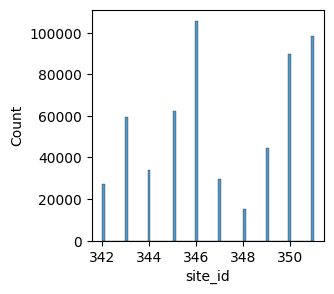

In [12]:
plt.figure(figsize=(3,3))
sns.histplot(dataset, x='site_id')
plt.show()

The site_id plot shows a clear difference in traffic or activity between different sites. Sites with IDs like 346 and 350 show significantly higher counts, indicating they receive much more attention or traffic compared to others. The high-traffic sites could have higher CPMs due to greater demand for impressions.

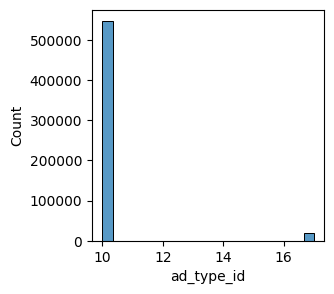

In [13]:
plt.figure(figsize=(3,3))
sns.histplot(dataset, x='ad_type_id')
plt.show()

The plot for ad_type_id indicates that the overwhelming majority of ads are of one type (ID 10), with very few ads of other types. This lack of diversity could either indicate a strong preference for a particular ad type by advertisers or a possible data imbalance that needs further investigation.

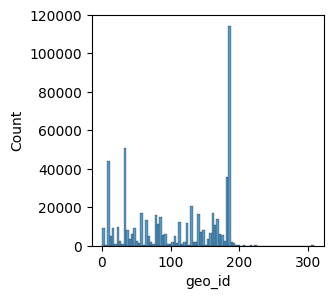

In [14]:
plt.figure(figsize=(3,3))
sns.histplot(dataset, x='geo_id')
plt.show()

The geo_id plot shows heavy clustering around a few specific regions (ID 200 is dominant). This suggests that the majority of traffic comes from a few locations.

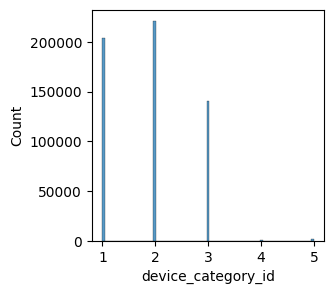

In [15]:
plt.figure(figsize=(3,3))
sns.histplot(dataset, x='device_category_id')
plt.show()

The device_category_id plot shows high activity for certain categories (IDs 1, 2, and 3), suggesting that most users access the website via mobile devices and desktop computers. Mobile and desktop experiences may differ in terms of ad effectiveness.

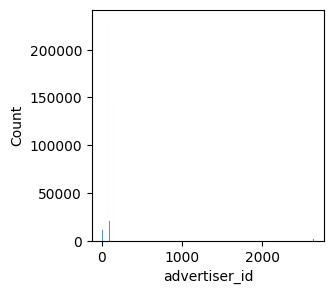

In [16]:
plt.figure(figsize=(3,3))
sns.histplot(dataset, x='advertiser_id')
plt.show()

The advertiser_id plot is highly skewed, with most of the data clustered around very few advertisers. This skew might indicate that a small number of advertisers are driving most of the auctions.

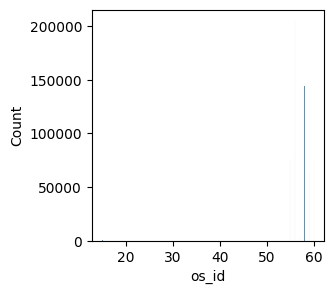

In [17]:
plt.figure(figsize=(3,3))
sns.histplot(dataset, x='os_id')
plt.show()

The os_id plot shows significant concentration in one OS category (likely not_mobile), which could represent desktop users or non-mobile platforms.

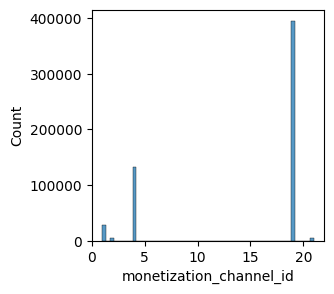

In [18]:
plt.figure(figsize=(3,3))
sns.histplot(dataset, x='monetization_channel_id')
plt.show()

The distribution of monetization_channel_id reveals that a few monetization channels dominate (particularly ID 20), meaning that the majority of the impressions are driven by one or two channels.

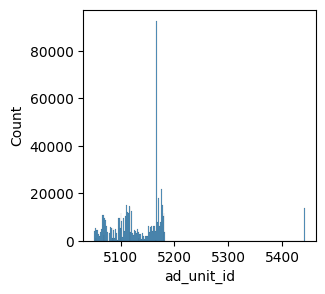

In [19]:
plt.figure(figsize=(3,3))
sns.histplot(dataset, x='ad_unit_id')
plt.show()

The ad_unit_id plot shows a significant spike around a particular range of IDs (especially around 5200). This suggests that specific ad units receive a much higher number of impressions compared to others. This imbalance indicates that a few ad units are driving the majority of impressions, which could be due to factors like prime ad locations or higher traffic pages.

It's clear that the dataset has significant imbalances across several features. These imbalances could skew the predictions of neural network model, making feature scaling an essential step for improving model performance.

## Exploratory Data Analysis (EDA)

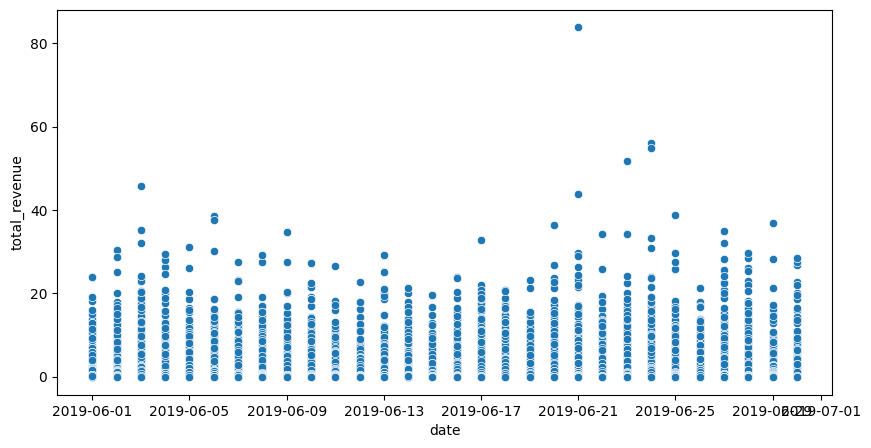

In [20]:
# Scatter plot of total revenue over time
plt.figure(figsize=(10,5))
sns.scatterplot(dataset, x='date', y='total_revenue')
plt.show()

The scatter plot of total_revenue against date reveals variability in revenue on different dates, with some extreme outliers around June 21st. This suggests that certain events or conditions may have triggered unusually high revenue during those days. It would be beneficial to investigate what caused these spikes (e.g., promotional events, increased traffic, etc.).

<Axes: xlabel='total_revenue'>

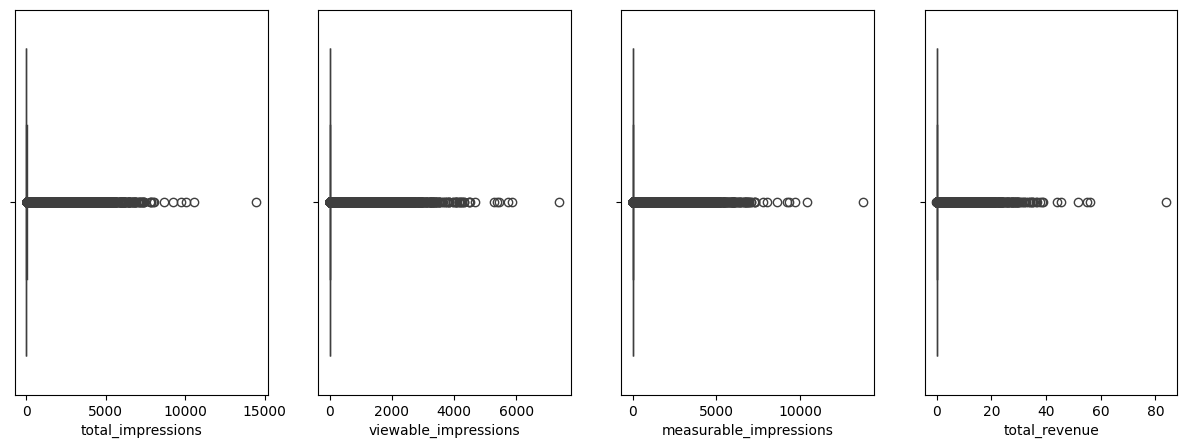

In [21]:
# Boxplots to explore numerical features for outliers
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
sns.boxplot(ax=axes[0], x=dataset['total_impressions'])
sns.boxplot(ax=axes[1], x=dataset['viewable_impressions'])
sns.boxplot(ax=axes[2], x=dataset['measurable_impressions'])
sns.boxplot(ax=axes[3], x=dataset['total_revenue'])

In [22]:
# Investigate outliers in numerical features
# For total_impressions
Upper_boundary_total_impressions = dataset.total_impressions.mean() + 3* dataset.total_impressions.std()
Lower_boundary_total_impressions = dataset.total_impressions.mean() - 3* dataset.total_impressions.std()
print('total_impressions outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Upper_boundary_total_impressions, upperboundary=Lower_boundary_total_impressions))
# For viewable_impressions
Upper_boundary_viewable_impressions = dataset.viewable_impressions.mean() + 3* dataset.viewable_impressions.std()
Lower_boundary_viewable_impressions = dataset.viewable_impressions.mean() - 3* dataset.viewable_impressions.std()
print('viewable_impressions outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Upper_boundary_viewable_impressions, upperboundary=Lower_boundary_viewable_impressions))
# For measurable_impressions
Upper_boundary_measurable_impressions = dataset.measurable_impressions.mean() + 3* dataset.measurable_impressions.std()
Lower_boundary_measurable_impressions = dataset.measurable_impressions.mean() - 3* dataset.measurable_impressions.std()
print('measurable_impressions outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Upper_boundary_measurable_impressions, upperboundary=Lower_boundary_measurable_impressions))
# For total_revenue
Upper_boundary_total_revenue = dataset.total_revenue.mean() + 3* dataset.total_revenue.std()
Lower_boundary_total_revenue = dataset.total_revenue.mean() - 3* dataset.total_revenue.std()
print('total_revenue outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Upper_boundary_total_revenue, upperboundary=Lower_boundary_total_revenue))

total_impressions outliers are values < 696.2700173563484 or > -628.9226700513497
viewable_impressions outliers are values < 318.80580151616516 or > -293.12930039064054
measurable_impressions outliers are values < 653.4423292649202 or > -589.1366942380997
total_revenue outliers are values < 2.210549908109114 or > -2.071069044848459


In [23]:
# Review statistics for numerical features
dataset[['total_impressions','viewable_impressions','measurable_impressions','total_revenue']].describe()

,total_impressions,viewable_impressions,measurable_impressions,total_revenue
count,567291.000000,567291.000000,567291.000000,567291.000000
mean,33.673674,12.838251,32.152818,0.069740
std,220.865448,101.989184,207.096504,0.713603
min,0.000000,0.000000,0.000000,-0.154200
25%,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,2.000000,0.000000
75%,6.000000,2.000000,6.000000,0.005400
max,14452.000000,7392.000000,13756.000000,83.822000


In [24]:
# Cap outliers based on the upper boundary calculated
dataset.loc[dataset.total_impressions>696, 'total_impressions'] = 696
dataset.loc[dataset.viewable_impressions>318, 'viewable_impressions'] = 318
dataset.loc[dataset.measurable_impressions>653, 'measurable_impressions'] = 653
dataset.loc[dataset.total_revenue>2.21, 'total_revenue'] = 2.21

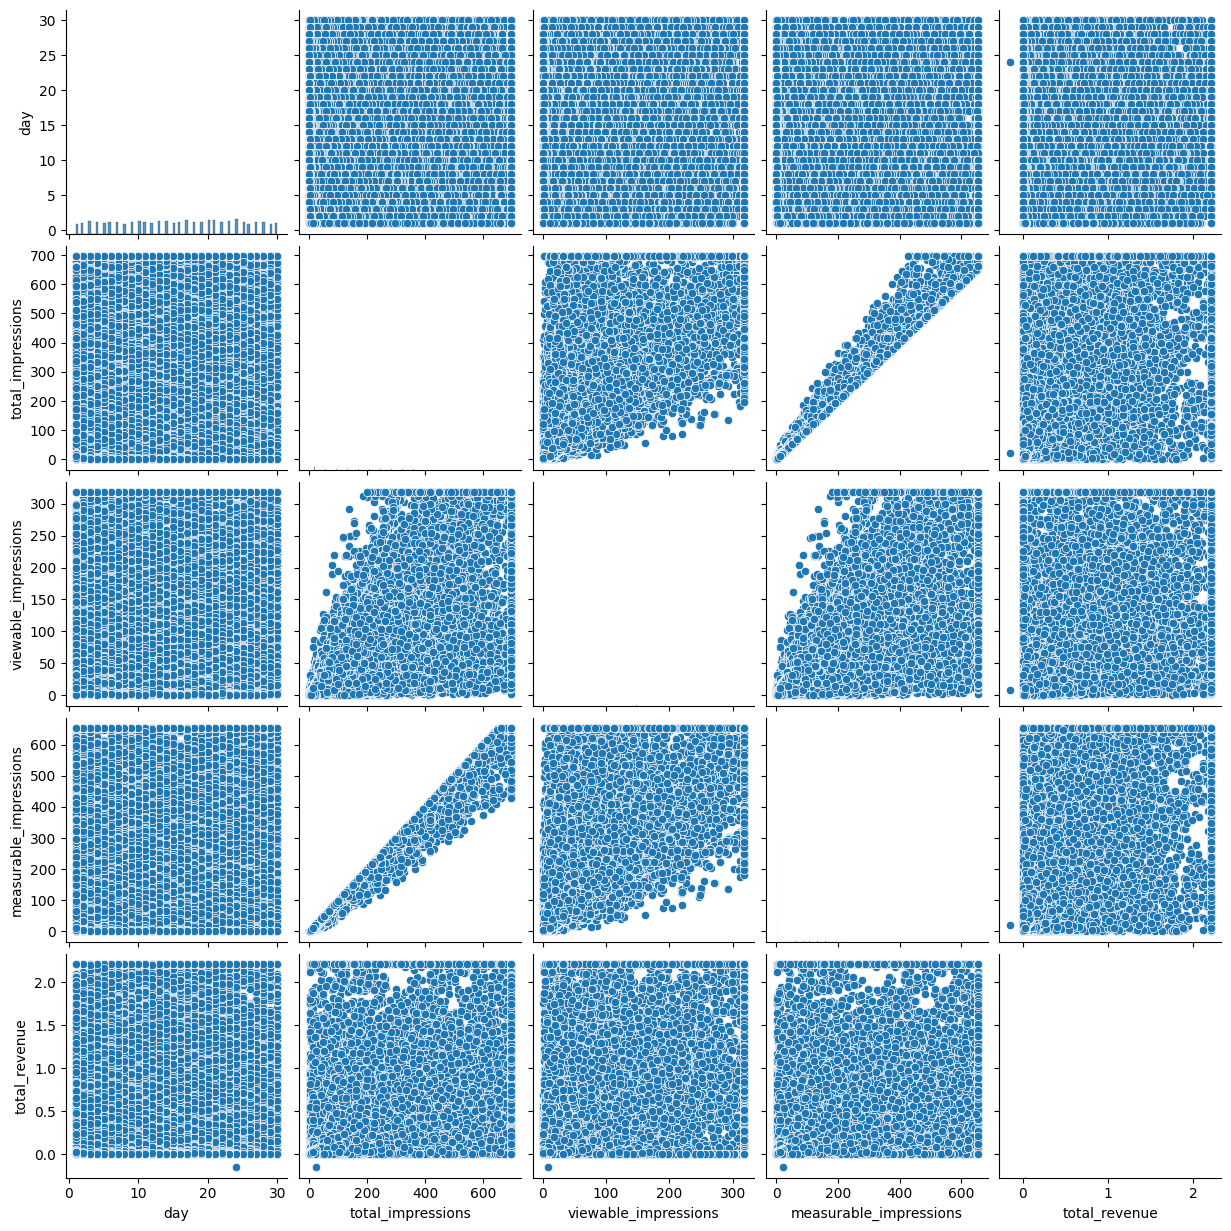

In [25]:
# Analyze correlations between numerical features
# Spearman correlation matrix
sns.pairplot(dataset[['day','total_impressions','viewable_impressions','measurable_impressions','total_revenue']])

In [26]:
# Spearman correlation values
dataset[['day','total_impressions','viewable_impressions','measurable_impressions','total_revenue']].corr(method='spearman')

,day,total_impressions,viewable_impressions,measurable_impressions,total_revenue
day,1.000000,0.007536,-0.009668,0.007119,0.001727
total_impressions,0.007536,1.000000,0.738165,0.997860,0.708002
viewable_impressions,-0.009668,0.738165,1.000000,0.740321,0.517777
measurable_impressions,0.007119,0.997860,0.740321,1.000000,0.711998
total_revenue,0.001727,0.708002,0.517777,0.711998,1.000000


<Axes: >

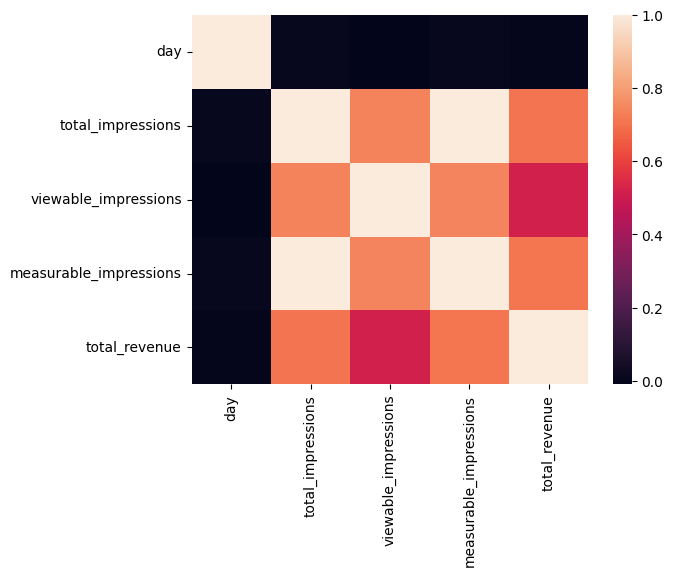

In [27]:
# Heatmap for correlation matrix
sns.heatmap(dataset[['day','total_impressions','viewable_impressions','measurable_impressions','total_revenue']].corr(method='spearman'))

In [28]:
# Statistical tests
r1 = spearmanr(dataset['total_impressions'], dataset['measurable_impressions'])
print('Spearman correlation:', r1[0], 'p-value:', r1[1])
r2 = spearmanr(dataset['total_impressions'], dataset['viewable_impressions'])
print('Spearman correlation:', r2[0], 'p-value:', r2[1])
r3 = spearmanr(dataset['total_impressions'], dataset['total_revenue'])
print('Spearman correlation:', r3[0], 'p-value:', r3[1])

Spearman correlation: 0.9978602680200271 p-value: 0.0
Spearman correlation: 0.738164709135726 p-value: 0.0
Spearman correlation: 0.7080024677918063 p-value: 0.0


In [29]:
# Remove highly correlated feature (measurable_impressions)
dataset = dataset.drop('measurable_impressions', axis=1)

In [30]:
# Drop non-informative date features, keep only 'day'
dataset = dataset.drop('date', axis=1)
dataset = dataset.drop('year', axis=1)
dataset = dataset.drop('month', axis=1)

## Modeling and Evaluation

In [31]:
# Specify the prediction target (total_revenue)
y = dataset.total_revenue
X = dataset.drop('total_revenue', axis=1)

In [32]:
# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

Epoch 1/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 32.7831 - val_loss: 16.7859
Epoch 2/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12.0850 - val_loss: 3.8347
Epoch 3/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14.4501 - val_loss: 5.1665
Epoch 4/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12.0357 - val_loss: 14.1102
Epoch 5/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7.5194 - val_loss: 7.0956
Epoch 6/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7.6813 - val_loss: 1.4738
Epoch 7/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5549 - val_loss: 6.3890
Epoch 8/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.8136 - val_loss: 3.9511
Epoch 9/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.3258 - val_loss: 5.2152
Epoch 10/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5610 - val_loss: 4.3820
Epoch 11/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5771 - val_loss: 3.3911
Epoch 12/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2m

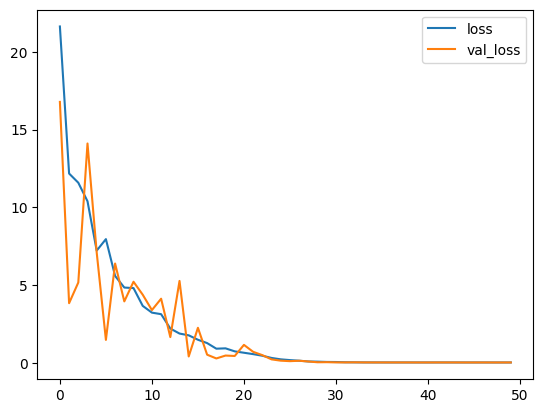

In [33]:
# Build a simple neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[13]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model with 'adam' optimizer and 'mae' loss function
model.compile(
    optimizer='adam',
    loss='mae',
)

# Train the model
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=512,
    epochs=50,
)

# Convert training history to a DataFrame and plot the loss curve
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [34]:
# Scaling the features using StandardScaler
# Specify the columns to be scaled
columns_for_scaling = ['site_id', 'ad_type_id', 'geo_id', 'device_category_id',
                    'advertiser_id', 'order_id', 'line_item_type_id', 'os_id',
                    'monetization_channel_id', 'ad_unit_id', 'total_impressions',
                    'viewable_impressions', 'day']
# Fit and transform the features using StandardScaler
scaler = StandardScaler()
X[columns_for_scaling] = scaler.fit_transform(X[columns_for_scaling])

In [35]:
# Split the data again after scaling
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

Epoch 1/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0432 - val_loss: 0.0226
Epoch 2/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0213 - val_loss: 0.0204
Epoch 3/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0201 - val_loss: 0.0189
Epoch 4/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0192 - val_loss: 0.0186
Epoch 5/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0181 - val_loss: 0.0179
Epoch 6/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0178 - val_loss: 0.0174
Epoch 7/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0174 - val_loss: 0.0173
Epoch 8/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0171 - val_loss: 0.0177
Epoch 9/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0168 - val_loss: 0.0170
Epoch 10/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0166 - val_loss: 0.0163
Epoch 11/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0162 - val_loss: 0.0165
Epoch 12/50
831/831 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

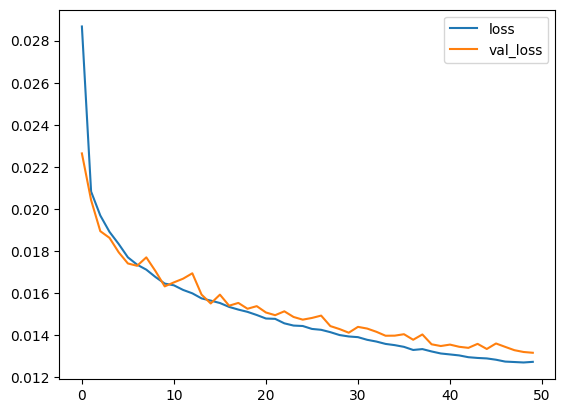

In [36]:
# Rebuild the neural network model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[13]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='mae',
)

# Train the model
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    batch_size=512,
    epochs=50,
)

# Convert training history to a DataFrame and plot the loss curve
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [37]:
X.to_csv('dataset_X.csv')
y.to_csv('dataset_y.csv')

## Conclusion and Insights

The first model struggled with larger loss fluctuations and slower convergence, likely due to unscaled features. The final validation loss was 0.0214.

The second model, with scaled features, had a much better start and smoother training, achieving a lower final validation loss of 0.0131. The model's convergence was more stable, indicating better learning efficiency.